In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

data = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Datasets/bank-full-transformed.csv')

In [2]:
lst = [data]

for column in lst:
    column.loc[column["pdays"] == 0,  'pdays'] = "Nunca antes contactado"
    column.loc[column["pdays"] == 1,  'pdays'] = "Contactado"
    column.loc[column["pdays"] == 2,  'pdays'] = "Contactado há mais de um mês"

In [3]:
px.histogram(data, x="pdays", color="pdays") 

In [4]:
data["pdays"].value_counts()

Nunca antes contactado    36933
Contactado                 8257
Name: pdays, dtype: int64

In [5]:
px.histogram(data, x="pdays", color="y", barmode = 'group') 

In [10]:
campaigny = pd.DataFrame(data.groupby('pdays')['y'].sum()).reset_index()
campaigny = campaigny.sort_values(by = 'y', ascending = False)
fig = px.bar(campaigny.iloc[:], #plotting only the top 20 Countries
             x = 'pdays', y = 'y', title = 'Distribuição de Subscrição com contactos anteriores')

fig.show()

In [7]:
count_job_response_pct = pd.crosstab(data['y'],data['pdays']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

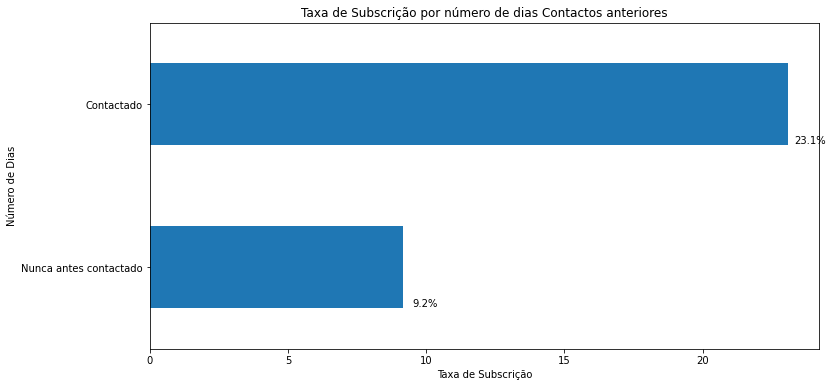

In [8]:
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Taxa de Subscrição por número de dias Contactos anteriores')
plt.xlabel('Taxa de Subscrição')
plt.ylabel('Número de Dias')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [9]:
labels = data['pdays'].value_counts().index
values = data['pdays'].value_counts().values

fig = px.pie(data, values= values, names= labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig.show()